In [ ]:
!pip install adversarial-robustness-toolbox

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 51.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.13.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import sys
!{sys.executable} -m pip install git+https://github.com/nottombrown/imagenet_stubs
sys.path.append("..")

%matplotlib inline

import tensorflow as tf

tf.compat.v1.disable_eager_execution()

import imagenet_stubs
import numpy as np
import tensorflow.keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
import tensorflow.keras.backend as k
from matplotlib import pyplot as plt
from IPython.display import clear_output

from art.estimators.classification import KerasClassifier
from art.attacks.evasion import HopSkipJump
from art.utils import to_categorical

  Cloning https://github.com/nottombrown/imagenet_stubs to /tmp/pip-req-build-p_wghbql
  Running command git clone --filter=blob:none --quiet https://github.com/nottombrown/imagenet_stubs /tmp/pip-req-build-p_wghbql
  Resolved https://github.com/nottombrown/imagenet_stubs to commit 0b501276f54cbf45b8e1b67dccbdcbe51de88365
  Preparing metadata (setup.py) ... done
  Created wheel for imagenet-stubs: filename=imagenet_stubs-0.0.7-py3-none-any.whl size=794799 sha256=5e14652d59bc41b775abc0f3518cf7d5e01bfaeb89c7bec0d338a957e8ff8ff7
  Stored in directory: /tmp/pip-ephem-wheel-cache-cz8_w12i/wheels/11/fe/f6/71c84cfe4ee113c44af28273d506ccbd346c66da9db8688fe6
Successfully built imagenet-stubs


In [ ]:
mean_imagenet = np.zeros([224, 224, 3])
mean_imagenet[...,0].fill(103.939)
mean_imagenet[...,1].fill(116.779)
mean_imagenet[...,2].fill(123.68)
model = ResNet50(weights='imagenet')
classifier = KerasClassifier(clip_values=(0, 255), model=model, preprocessing=(mean_imagenet, np.ones([224, 224, 3])))

Instructions for updating:
Colocations handled automatically by placer.


102967424/102967424 [==============================] - 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Target image is:  105


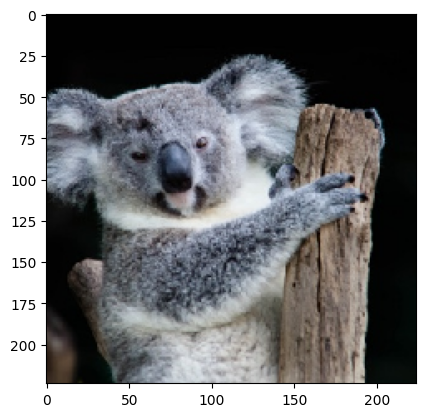

Init image is:  866


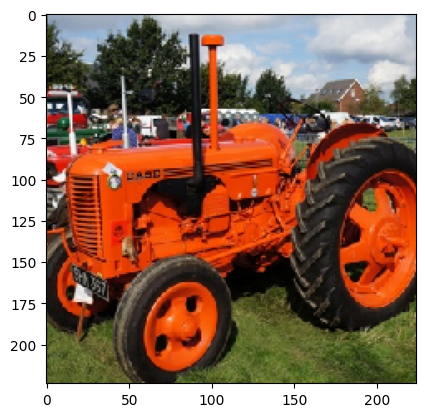

In [ ]:
target_image_name = 'koala.jpg'
init_image_name = 'tractor.jpg'
for image_path in imagenet_stubs.get_image_paths():
    if image_path.endswith(target_image_name):
        target_image = image.load_img(image_path, target_size=(224, 224))
        target_image = image.img_to_array(target_image)
    if image_path.endswith(init_image_name):
        init_image = image.load_img(image_path, target_size=(224, 224))
        init_image = image.img_to_array(init_image)

print("Target image is: ", np.argmax(classifier.predict(np.array([target_image]))[0]))
plt.imshow(target_image.astype(np.uint))
plt.show()
print("Init image is: ", np.argmax(classifier.predict(np.array([init_image]))[0]))
plt.imshow(init_image.astype(np.uint))
plt.show()

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 0. L2 error 15304.849 and class label 106.


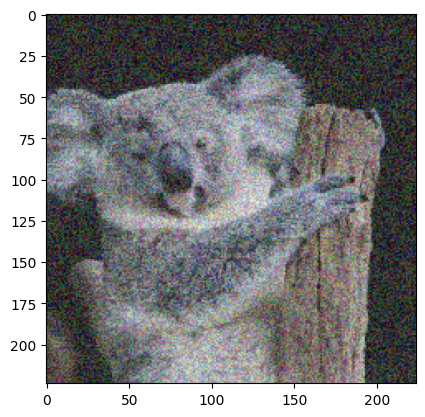

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 10. L2 error 7517.105 and class label 359.


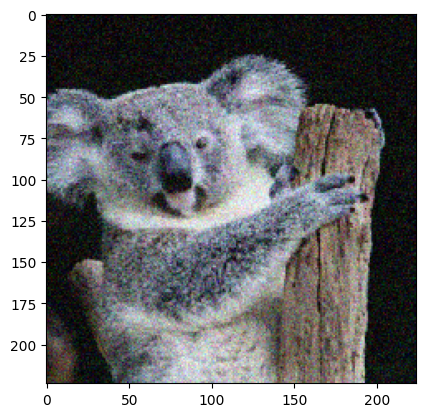

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 20. L2 error 5350.328 and class label 356.


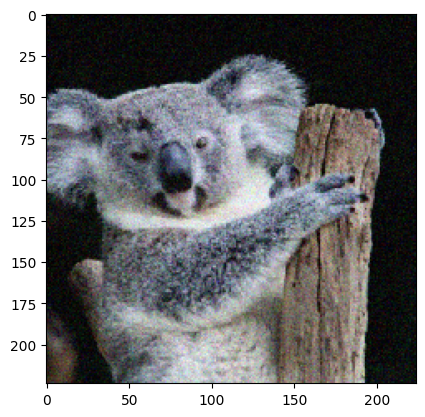

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 30. L2 error 3898.7207 and class label 356.


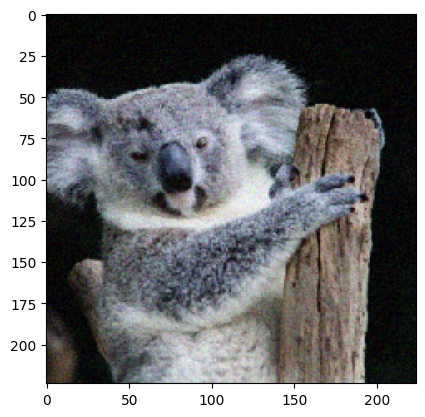

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 40. L2 error 2992.6396 and class label 356.


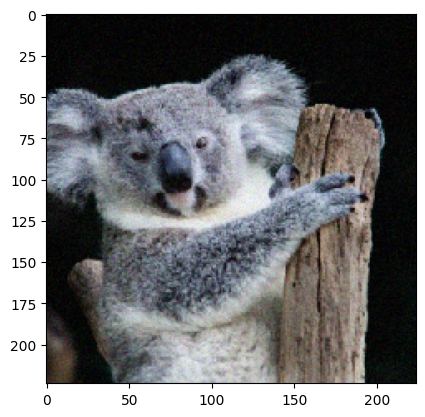

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 50. L2 error 2437.7573 and class label 356.


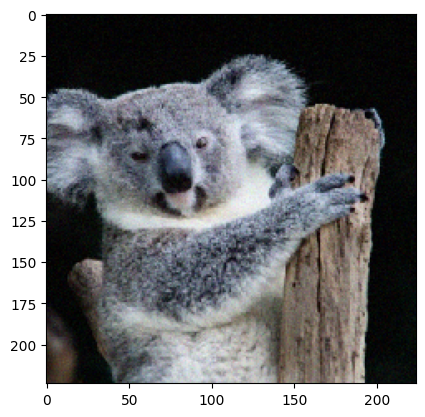

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
attack = HopSkipJump(classifier=classifier, targeted=False, max_iter=0, max_eval=1000, init_eval=10)
iter_step = 10
x_adv = None
for i in range(20):
    x_adv = attack.generate(x=np.array([target_image]), x_adv_init=x_adv, resume=True)

    #clear_output()
    print("Adversarial image at step %d." % (i * iter_step), "L2 error",
          np.linalg.norm(np.reshape(x_adv[0] - target_image, [-1])),
          "and class label %d." % np.argmax(classifier.predict(x_adv)[0]))
    plt.imshow(x_adv[0].astype(np.uint))
    plt.show(block=False)

    attack.max_iter = iter_step

In [ ]:
from keras.models import load_model
model = load_model('/content/cnn_20_epochs.h5')
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
# Scale the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Transform target variable into one-hotencoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
_, acc = model.evaluate(X_test, y_test)
print('> %.3f' % (acc * 100.0))

ValueError: ignored

In [ ]:
y_base_pred = model.predict(X_test)
print(y_base_pred)
y_pred = np.argmax(y_base_pred, axis=-1)
print(y_pred)
np.save('CNN_base_prediction_labels.npy', y_pred)

[[1.4362103e-06 1.5200625e-06 1.6065092e-04 ... 4.6626856e-06
  1.5027775e-06 7.4964191e-07]
 [2.2033413e-09 6.9072485e-05 6.0142484e-16 ... 2.8603717e-17
  9.9993098e-01 4.6955851e-08]
 [2.6024543e-04 7.2115403e-01 1.0018511e-05 ... 3.5983373e-07
  2.7594858e-01 2.5252625e-03]
 ...
 [1.5267139e-10 1.0248959e-09 3.7268980e-04 ... 7.0231268e-04
  2.6662335e-09 5.9615826e-11]
 [2.9193392e-05 9.9850971e-01 4.2819280e-05 ... 3.6689631e-05
  1.7576651e-05 3.4321265e-04]
 [1.6142636e-13 1.6406613e-16 1.9016324e-09 ... 9.9999797e-01
  8.3641658e-15 2.1303709e-15]]
[3 8 1 ... 5 1 7]


In [ ]:
y_base_pred = model.predict(X_test)
print(y_base_pred)
y_pred = np.argmax(y_base_pred, axis=-1)
print(y_pred)
np.save('VGG_simnple_base_prediction_labels.npy', y_pred)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[[3.5654237e-05 6.6227822e-06 1.7297843e-04 ... 2.3206929e-04
  4.0637729e-05 2.3716802e-05]
 [1.2882467e-07 4.4448389e-05 5.3914155e-15 ... 6.6065977e-18
  9.9995542e-01 8.1459373e-09]
 [1.9531574e-03 4.2505784e-05 6.0425541e-06 ... 4.7312901e-06
  9.9794966e-01 2.8521088e-05]
 ...
 [1.0736230e-06 5.1435092e-07 2.9154574e-02 ... 7.2273277e-03
  6.6605489e-06 3.5033966e-07]
 [6.0985417e-06 9.9999213e-01 7.2829960e-07 ... 2.6527627e-10
  9.3004383e-07 1.1912578e-07]
 [2.2218211e-22 1.0700995e-22 1.3751549e-14 ... 9.9999857e-01
  1.6246584e-21 3.0096222e-19]]
[3 8 8 ... 5 1 7]


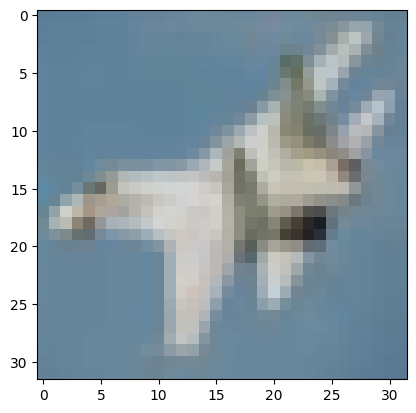

In [ ]:
plt.imshow(X_test[10])

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


HopSkipJump:   0%|          | 0/10000 [00:00<?, ?it/s]

Adversarial image at step 0. L2 error 7.989658962060768 and class label 4.


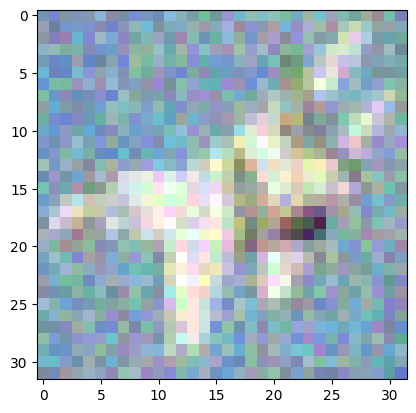

HopSkipJump:   0%|          | 0/10000 [00:00<?, ?it/s]

Adversarial image at step 10. L2 error 0.4906354730994145 and class label 4.


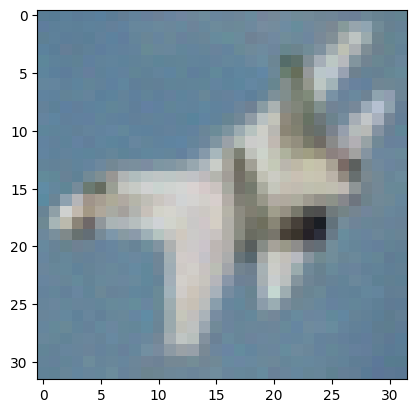

In [ ]:
classifier = KerasClassifier(clip_values=(0, 255), model=model)
attack = HopSkipJump(classifier=classifier, targeted=False, max_iter=0, max_eval=1000, init_eval=10)
iter_step = 10
x_adv = None
for i in range(2):
    x_adv = attack.generate(x=X_test, x_adv_init=x_adv, resume=False)

    #clear_output()
    print("Adversarial image at step %d." % (i * iter_step), "L2 error",
          np.linalg.norm(np.reshape(x_adv[10] - X_test[10], [-1])),
          "and class label %d." % np.argmax(classifier.predict(x_adv)[10]))
    plt.imshow(x_adv[10])
    plt.show(block=False)

    attack.max_iter = iter_step

In [ ]:
_, acc = model.evaluate(x_adv, y_test, verbose=1)
print('> %.3f' % (acc * 100.0))

NameError: ignored

In [ ]:
np.save('cnn_adv.npy', x_adv)
#np.save('y_test_label.npy', y_test)

In [ ]:
import numpy as np
data = np.load('/content/Vgg_adv.npy')
print(data)

[[[[0.6493214  0.42423317 0.20253122]
   [0.61620575 0.4720088  0.19951904]
   [0.69529146 0.45913127 0.20247112]
   ...
   [0.55322653 0.39686137 0.14623618]
   [0.49220905 0.36717045 0.18069647]
   [0.49167415 0.3097224  0.1366674 ]]

  [[0.60710126 0.46416873 0.1836864 ]
   [0.59341747 0.42742756 0.21778241]
   [0.6400926  0.42755008 0.16932698]
   ...
   [0.5470341  0.37288183 0.15013085]
   [0.5115378  0.36707017 0.1395312 ]
   [0.46431786 0.34999678 0.15870993]]

  [[0.5991168  0.48806724 0.22032027]
   [0.5770397  0.40325746 0.13886446]
   [0.6373457  0.44648173 0.1742843 ]
   ...
   [0.55786365 0.37945908 0.13826528]
   [0.54974127 0.34080335 0.12328595]
   [0.48974437 0.3574456  0.12558973]]

  ...

  [[0.30909434 0.5165277  0.7201936 ]
   [0.16443785 0.4100542  0.5935069 ]
   [0.13033068 0.32559878 0.55092967]
   ...
   [0.19650389 0.38532597 0.57589734]
   [0.06811986 0.2506395  0.42828795]
   [0.14642069 0.31373835 0.4842054 ]]

  [[0.23392442 0.46685055 0.6551545 ]
   [0.1

In [ ]:
# Get labels for VGG augmentated with adversarial attack
from keras.models import load_model
model = load_model('/content/VGG_dropout.h5')

x_adv = np.load('/content/Vgg_adv.npy')
print(x_adv)
y_adv = model.predict(x_adv)
y_adv = np.argmax(y_adv, axis=-1)
print(y_adv)
np.save('VGG_augm_output_on_hopskip.npy', y_adv)

[[[[0.6493214  0.42423317 0.20253122]
   [0.61620575 0.4720088  0.19951904]
   [0.69529146 0.45913127 0.20247112]
   ...
   [0.55322653 0.39686137 0.14623618]
   [0.49220905 0.36717045 0.18069647]
   [0.49167415 0.3097224  0.1366674 ]]

  [[0.60710126 0.46416873 0.1836864 ]
   [0.59341747 0.42742756 0.21778241]
   [0.6400926  0.42755008 0.16932698]
   ...
   [0.5470341  0.37288183 0.15013085]
   [0.5115378  0.36707017 0.1395312 ]
   [0.46431786 0.34999678 0.15870993]]

  [[0.5991168  0.48806724 0.22032027]
   [0.5770397  0.40325746 0.13886446]
   [0.6373457  0.44648173 0.1742843 ]
   ...
   [0.55786365 0.37945908 0.13826528]
   [0.54974127 0.34080335 0.12328595]
   [0.48974437 0.3574456  0.12558973]]

  ...

  [[0.30909434 0.5165277  0.7201936 ]
   [0.16443785 0.4100542  0.5935069 ]
   [0.13033068 0.32559878 0.55092967]
   ...
   [0.19650389 0.38532597 0.57589734]
   [0.06811986 0.2506395  0.42828795]
   [0.14642069 0.31373835 0.4842054 ]]

  [[0.23392442 0.46685055 0.6551545 ]
   [0.1

In [ ]:
_, acc = model.evaluate(x_adv, y_test, verbose=1)
print('> %.3f' % (acc * 100.0))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


> 77.930
